In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, wilcoxon

In [9]:
df = pd.read_csv('Credit_Scoring.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome) nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)

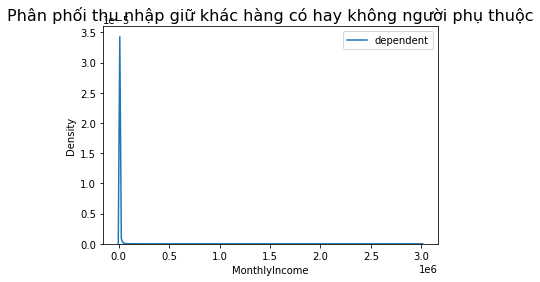

In [10]:
independ = df.loc[df['NumberOfDependents'].isna(),'MonthlyIncome']
depend = df.loc[df['NumberOfDependents'].notna(),'MonthlyIncome']
sns.kdeplot(independ, label = 'independent')
sns.kdeplot(depend,label = 'dependent')
plt.title('Phân phối thu nhập giữ khác hàng có hay không người phụ thuộc', fontsize = 16)
plt.legend()
plt.show()

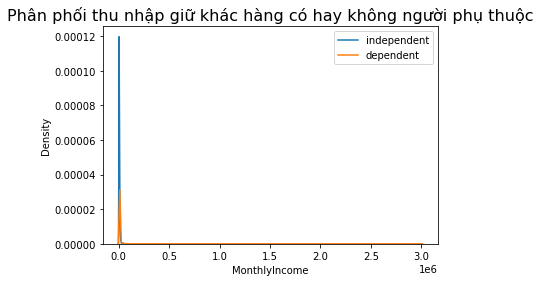

In [11]:
# nội suy
df['MonthlyIncome'] = df['MonthlyIncome'].interpolate('nearest')

##
independ = df.loc[df['NumberOfDependents'].isna(),'MonthlyIncome']
depend = df.loc[df['NumberOfDependents'].notna(),'MonthlyIncome']
sns.kdeplot(independ , label = 'independent')
sns.kdeplot(depend,label = 'dependent')
plt.title('Phân phối thu nhập giữ khác hàng có hay không người phụ thuộc', fontsize = 16)
plt.legend()
plt.show()

In [13]:
## Giả thuyết
## Thu nhập theo tháng bằng với thu thập phụ thuộc
## Thu nhập theo tháng nhỏ hơn thu nhập phụ thuộc
statistic, pvalue = ttest_ind(independ.values,depend.values,equal_var=False, alternative='less')
print(f'statistic : {statistic}')
print(f'pvalue : {pvalue}')

statistic : nan
pvalue : nan
